<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/TimeSeries/TimeSeriesData_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this example I used Icecream and Stock time-series datasets to plot ACF and PACF <br>
Datasets I used for this tutorial can be downloaded from my github.

<br> <br>

---



Written by: Arjang Fahim<br>
Date: 2/10/2022<br>
Last update: 2/10/2022<br>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

# Ice Cream Production Data

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
icecream_data = "your dir/ice_cream.csv"

In [11]:
df_icecream = pd.read_csv(icecream_data)

In [12]:
df_icecream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [13]:
df_icecream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [14]:
df_icecream.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [15]:
df_icecream['date'] = pd.to_datetime(df_icecream.date)

In [16]:
df_icecream.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [17]:
# set date column as index
df_icecream.set_index('date', inplace=True)

In [18]:
start_date = pd.to_datetime('2010-01-01')
df_icecream = df_icecream[start_date:]

In [19]:
df_icecream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [20]:
df_icecream.tail()

,production
date,
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223
2019-12-01,75.7094
2020-01-01,83.6290


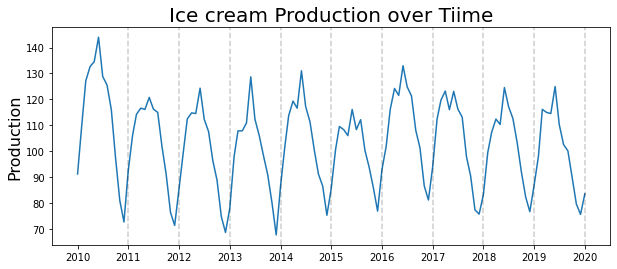

In [21]:
plt.figure(figsize=(10,4))
plt.plot(df_icecream.production)
plt.title("Ice cream Production over Tiime", fontsize=20)
plt.ylabel("Production", fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF - Auto Correlation Function

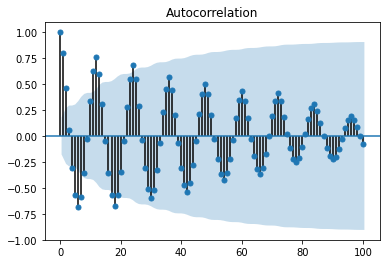

In [33]:
acf_plot = plot_acf(df_icecream.production, lags=100)

# Based on decaying ACF, we are likely dealing with an Auto Regressive process?

# PACF = Partial Auto Correlation Function

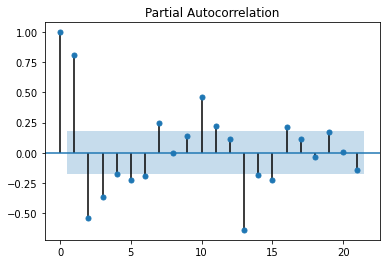

In [34]:
pacf_plot = plot_pacf(df_icecream.production)

# Based on PACF, we should start with Auto Regressive model with lags 1, 2,3, 10, 13

## On stock data

In [36]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [37]:
import yfinance as yf

In [38]:
# defining the ticker symbol
tickerSymbol = 'SPY'

In [39]:
tickerData = yf.Ticker(tickerSymbol)

In [40]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [41]:
tickerDf = tickerDf[['Close']]

In [42]:
tickerDf.head()

,Close
Date,
2015-01-02,179.784180
2015-01-05,176.537292
2015-01-06,174.874451
2015-01-07,177.053650
2015-01-08,180.195450


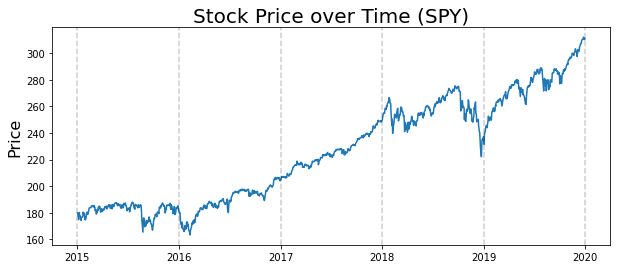

In [43]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# Stationarity: take first difference of this series

In [44]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [45]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [46]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02,179.784180,-3.246887
2015-01-05,176.537292,-1.662842
2015-01-06,174.874451,2.179199
2015-01-07,177.053650,3.141800
2015-01-08,180.195450,-1.444031


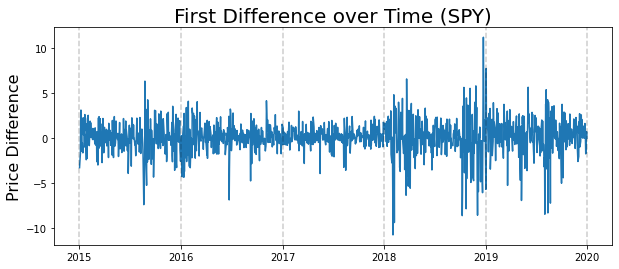

In [48]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF - Auto Correlation Function

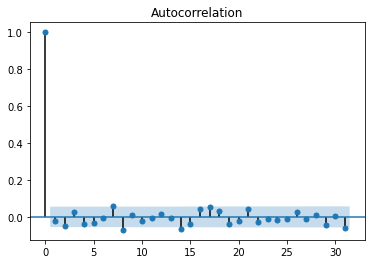

In [49]:
acf_plot = plot_acf(tickerDf.FirstDifference)


The ACF doesn't help. All points are inside the error zone. This is not helpful!

# PACF = Partial Auto Correlation Function

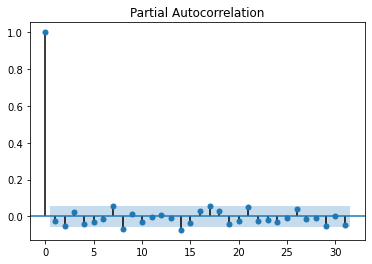

In [50]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)


PACF also doesn't tell us much. That why stocks are so complex to analyse. Here we did not do any complex analysis but you can see there is not any partucylar lag stands in neither ACF or PACF.